EDA


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Introduction
The dataset comprises credit card transactions made by European cardholders in September 2013. It includes transactions from a span of two days, with 492 fraudulent transactions out of a total of 284,807. This results in a highly imbalanced dataset, where the positive class (frauds) represents only 0.172% of all transactions.

All input variables in the dataset are numerical and have undergone PCA transformation. Due to confidentiality constraints, the original features and additional background information are not available. The features, named V1, V2, ..., V28, are the principal components derived from PCA. The only exceptions are the 'Time' and 'Amount' features, which have not been transformed. 'Time' indicates the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' represents the transaction amount and can be used for example-dependent cost-sensitive learning. The response variable, 'Class,' is set to 1 in the case of fraud and 0 otherwise.

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,27819.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,...,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000
mean,20434.634315,-0.217255,0.149360,0.723559,0.221251,-0.199312,0.084607,-0.125687,0.028612,0.394412,...,-0.035045,-0.126646,-0.041207,0.010602,0.129963,0.023506,0.013398,0.004055,77.297298,0.003343
std,11866.057310,1.866645,1.545773,1.648474,1.425213,1.431480,1.325535,1.308413,1.314408,1.262314,...,0.803370,0.642121,0.544077,0.590914,0.436275,0.513862,0.393823,0.278450,219.651476,0.057724
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,9037.500000,-0.951060,-0.424408,0.271315,-0.690871,-0.788013,-0.658281,-0.595865,-0.162449,-0.420660,...,-0.246695,-0.547732,-0.174773,-0.326892,-0.132690,-0.336775,-0.063637,-0.008436,6.442500,0.000000
50%,24675.000000,-0.259642,0.163461,0.855090,0.202149,-0.230110,-0.174349,-0.068385,0.032587,0.305709,...,-0.093654,-0.100015,-0.049634,0.063056,0.169235,-0.054798,0.008119,0.020201,19.950000,0.000000
75%,31319.000000,1.166130,0.803933,1.483404,1.102574,0.316960,0.471794,0.445844,0.290104,1.152587,...,0.079173,0.281732,0.075486,0.398937,0.412015,0.305465,0.091483,0.076658,69.507500,0.000000
max,34712.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [6]:
df.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [7]:
df.isnull().sum()

,0
Time,0
V1,1
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [8]:
fraud = round(len(df[df['Class']==1])/len(df)*100,2)
nofraud = round(len(df[df['Class']==0])/len(df)*100,2)

print("No fraud transactions are:",str(nofraud)+'%',"of the dataset")
print("Fraud transactions are:",str(fraud)+'%',"of the dataset")

No fraud transactions are: 99.66% of the dataset
Fraud transactions are: 0.33% of the dataset


UNIVARIETE ANALYSIS

Univariate analysis generally refers to the data analysis where there is only one dependent variable. The main goal of the univariate analysis is to summarize the data. We can easily identify measures of central tendency like mean, median, mode, the quartiles, and the standard deviation.

BIVARIETE ANALYSIS

Bivariate analysis happens between 2 variables to identify the relationship between them. There are three types of bivariate analysis:

Numerical-Numerical (scatter plot, linear correlation)
Categorical-Categorical (Chi-Square)
Numerical-Categorical (Z-test, T-test)
UNIVARIATE ANALYSIS

To start our data analysis we are going to do univariate and bivariate analysis, taking the following as features we are going to do out univariate analysis first.

Class
Amount
Transaction time
all the remaining features[V1....V28]
We can see that our class variable is highly imbalanced as we already know

Text(0.5, 1.0, '0: Non-fraudulent 1: Fraudulent')

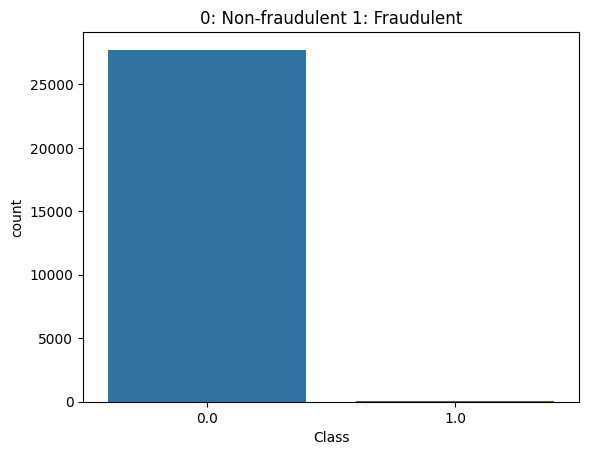

In [9]:
sns.countplot(x='Class',data=df)
plt.title("0: Non-fraudulent 1: Fraudulent")

The amount variable is most dense around the samllar amount regions


Text(0.5, 1.0, 'Distribution of Amount')

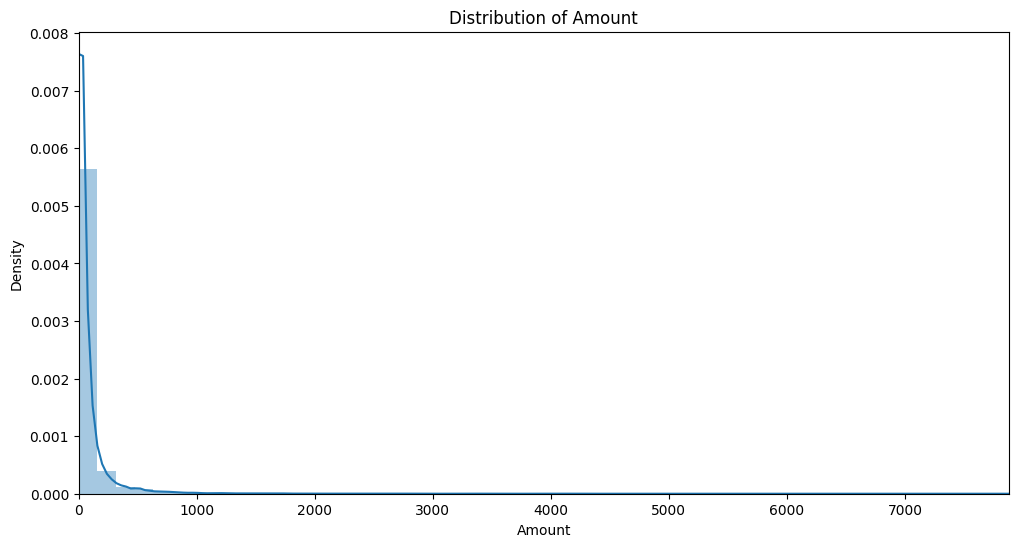

In [10]:
amount_val = df['Amount'].values
plt.figure(figsize = (12,6))
sns.distplot(df['Amount'])
plt.xlim(min(amount_val),max(amount_val))
plt.title("Distribution of Amount")

Time has bimodal distribution i.e. the peak rises and falls down and rises again. The fall might happen due to night time.

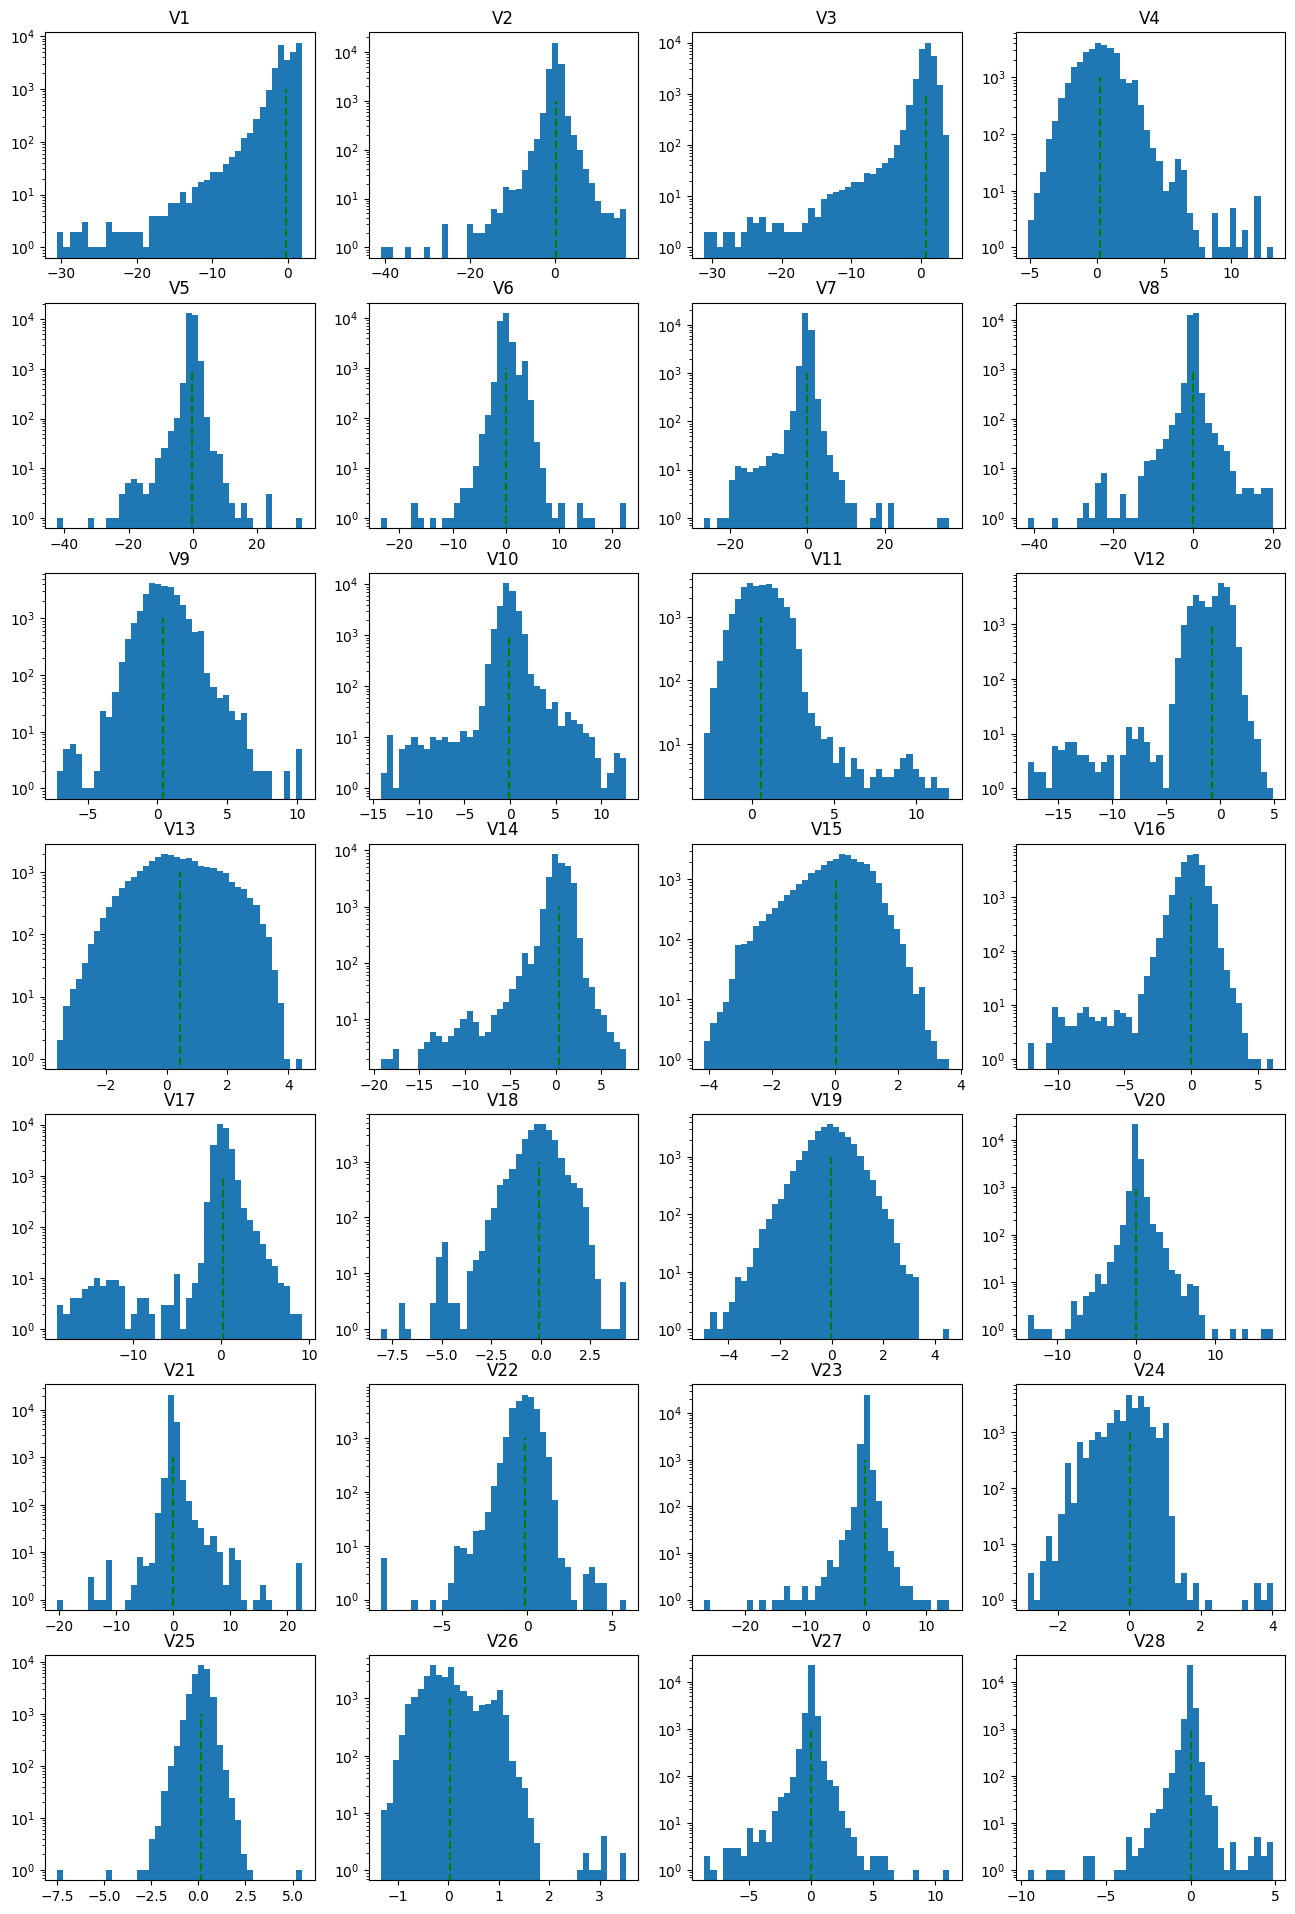

In [11]:
#distribution of the different features

fig, ax = plt.subplots(nrows=7,ncols=4,figsize=(16,24))

for i in range(1,29):
  m = (i-1)//4
  n = (i-1)%4
  col = 'V' + str(i)
  ax[m,n].hist(df[col],bins=40)
  ax[m,n].set_title(col)
  ax[m,n].vlines(x=df[col].mean(),ymin=0,ymax=10**3,linestyle='dashed',colors='g')
  ax[m,n].set_yscale('log')

BIVARIATE ANALYSIS

Bivariate analysis content

It can be clearly observed that there are very less data points having amount greater than 10,000(all in the non-fraudulent category), hence we can exclude these from our dataset.

Text(0.5, 1.0, 'Amount vs Class')

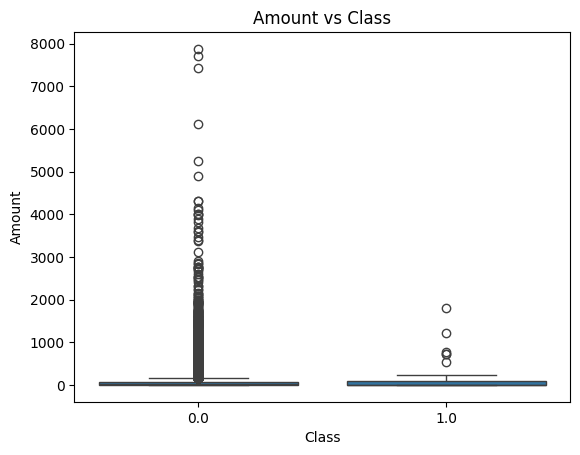

In [12]:
#class vs amount
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')

In [13]:
#checking the above observation
df[df['Amount']>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [14]:
#excluding the above mentioned points
df = df[df['Amount']<10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,...,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000
mean,20435.367676,-0.217255,0.149360,0.723559,0.221251,-0.199312,0.084607,-0.125687,0.028612,0.394412,...,-0.035045,-0.126646,-0.041207,0.010602,0.129963,0.023506,0.013398,0.004055,77.297298,0.003343
std,11865.640133,1.866645,1.545773,1.648474,1.425213,1.431480,1.325535,1.308413,1.314408,1.262314,...,0.803370,0.642121,0.544077,0.590914,0.436275,0.513862,0.393823,0.278450,219.651476,0.057724
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,9038.250000,-0.951060,-0.424408,0.271315,-0.690871,-0.788013,-0.658281,-0.595865,-0.162449,-0.420660,...,-0.246695,-0.547732,-0.174773,-0.326892,-0.132690,-0.336775,-0.063637,-0.008436,6.442500,0.000000
50%,24676.000000,-0.259642,0.163461,0.855090,0.202149,-0.230110,-0.174349,-0.068385,0.032587,0.305709,...,-0.093654,-0.100015,-0.049634,0.063056,0.169235,-0.054798,0.008119,0.020201,19.950000,0.000000
75%,31319.000000,1.166130,0.803933,1.483404,1.102574,0.316960,0.471794,0.445844,0.290104,1.152587,...,0.079173,0.281732,0.075486,0.398937,0.412015,0.305465,0.091483,0.076658,69.507500,0.000000
max,34712.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [16]:
#amount vs time distribution

data_new = df
timedelta = pd.to_timedelta(data_new['Time'],unit='s')

data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

Text(0.5, 1.0, 'Amounts by hours of Frauds and Normal Transactions')

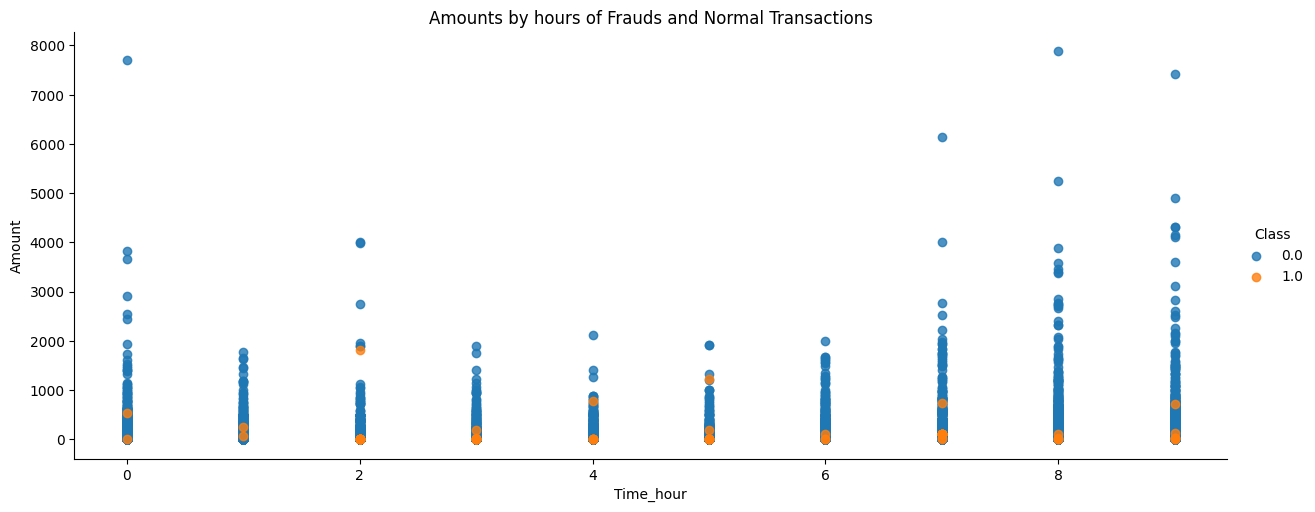

In [17]:
ax = sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=2.5,data=data_new,hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)

CONCLUSIONS FROM EDA




*   List item
*   List item


The data consisted of around 2,85,000 data points, 30 features including time

and amount, and the labeled class of whether a transaction is actually fraud or not.
There were no null values present in the original dataset but the data was highly skewed with 99.83% of the data points being non-fraudulent transactions.
The time feature had a bimodal distribution i.e. peaks falling and rising. I have concluded that the peaks might fall due to lesser transactions during nighttime.
Very small proportion of transactions had amounts > 10,000 hence they were eliminated from the dataset.
Most of the fraudulent transactions were of small amounts (<1000 units - since we don’t know about the units about the currency).
The occurrence of fraudulent transactions was independent of the time of the day.



Data Preprocessing
SCALING

Standardization and Robust Scalar

Since fraud transactions which are also low in number have relatively smaller value(amount) so we need to have our data scaled, We are going to use robust scalar to scale our data.

In [18]:

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1,inplace=True)

In [19]:
df.drop(['Time_min','Time_hour'],axis=1,inplace=True)

In [20]:
#inserting these scaled columns at 0,1
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'],axis=1,inplace=True)
df.insert(0,'scaled_amount',scaled_amount)

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.056133,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.273686,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,5.687941,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.641957,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.793467,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [26]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1,random_state=42)

new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
7761,-0.221200,1.161761,-0.196479,1.452584,0.455138,-1.142185,-0.169109,-0.855188,0.083913,1.981777,...,-0.090650,-0.200189,-0.155091,0.083476,0.555640,0.047534,0.888950,-0.059419,0.002949,0.0
18191,0.191073,-0.923542,1.294228,1.196839,-0.322929,-0.017100,-0.354101,0.693215,0.087489,-0.288895,...,0.367677,-0.266370,-0.568831,-0.056987,-0.019916,-0.067760,0.084101,0.495272,0.224795,0.0
10204,-0.135733,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,1.908963,...,-0.465679,1.963597,-0.217414,-0.549340,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,1.0
26820,5.708396,-2.236838,-1.590718,0.414913,-1.167966,-0.921649,-0.967784,1.091017,-0.194668,1.170608,...,-0.190571,0.055154,0.352333,-0.512710,0.498277,-0.029830,-0.882495,0.165907,-0.792992,0.0
3836,-0.316340,-1.236766,1.151157,2.651650,2.465221,-0.402151,1.222217,-0.578716,-0.314207,-0.505812,...,-0.299030,0.888291,0.083495,0.059910,0.179198,-0.420011,0.050578,-0.211931,0.146848,0.0


Detecting Outliers

In [27]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class<-0.6]['Class']

,Class
V3,-0.736943
V7,-0.672142
V9,-0.630694
V10,-0.784097
V12,-0.780644
V14,-0.834012
V16,-0.718941
V17,-0.729916


In [28]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class>0.5]['Class']

,Class
V2,0.675189
V4,0.782250
V11,0.755192
Class,1.000000


V4, V11 are our highly positively correlated featres and V10, V12, V14 have high negative correlation with class, now we do outlier analysis and removal.

-Negative correlations with our class (the lower the feature value, higher the chances of it being a fraud transaction)

We use seaborn boxplot for our visualization.

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

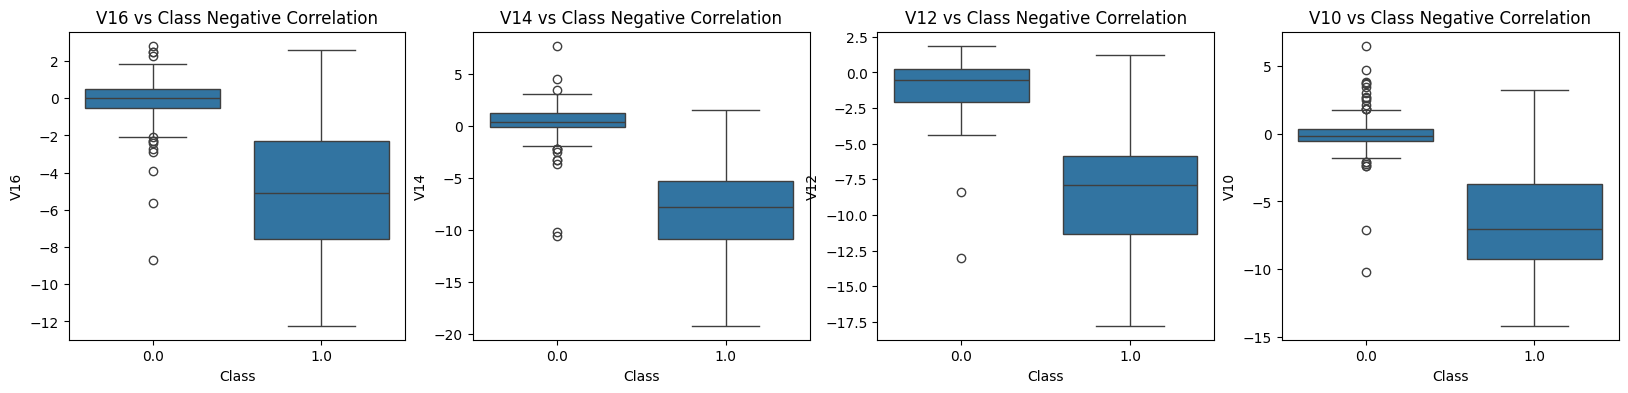

In [29]:
f, axes = plt.subplots(ncols=4,figsize=(20,4))

#Negative correlations with our class (the lower the feature value, higher the chances of it being a fraud transaction)
sns.boxplot(x='Class',y='V16',data=new_df,ax=axes[0])
axes[0].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V4 vs Class Positive Correlation')

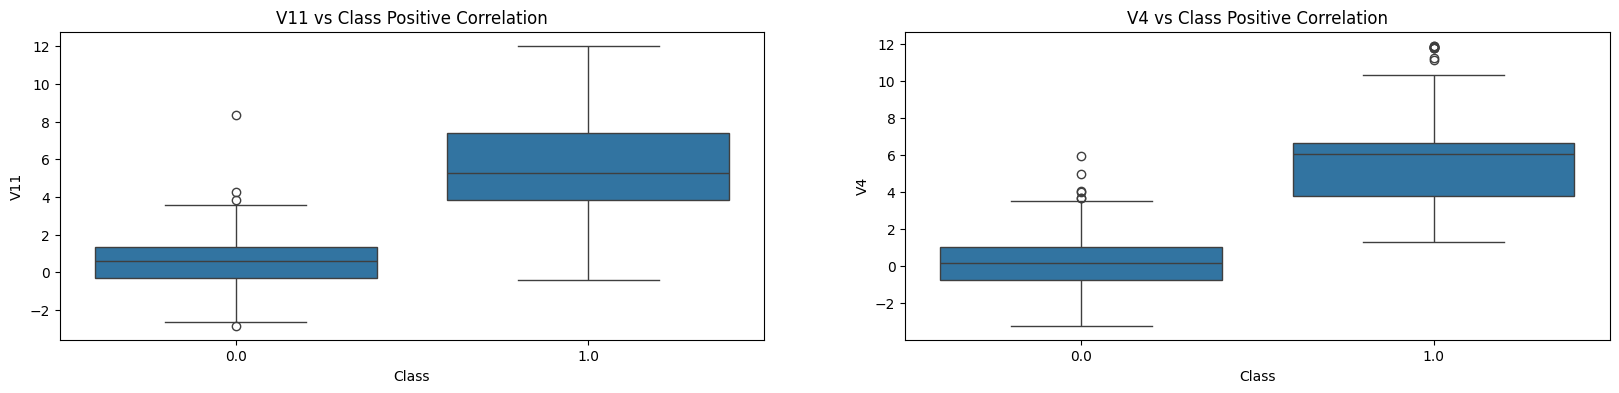

In [30]:
f, axes = plt.subplots(ncols=2,figsize=(20,4))

#Positive correlations (the higher the feature the probability of a fraud transaction increases)
sns.boxplot(x='Class',y='V11',data=new_df, ax = axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V4',data=new_df, ax = axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

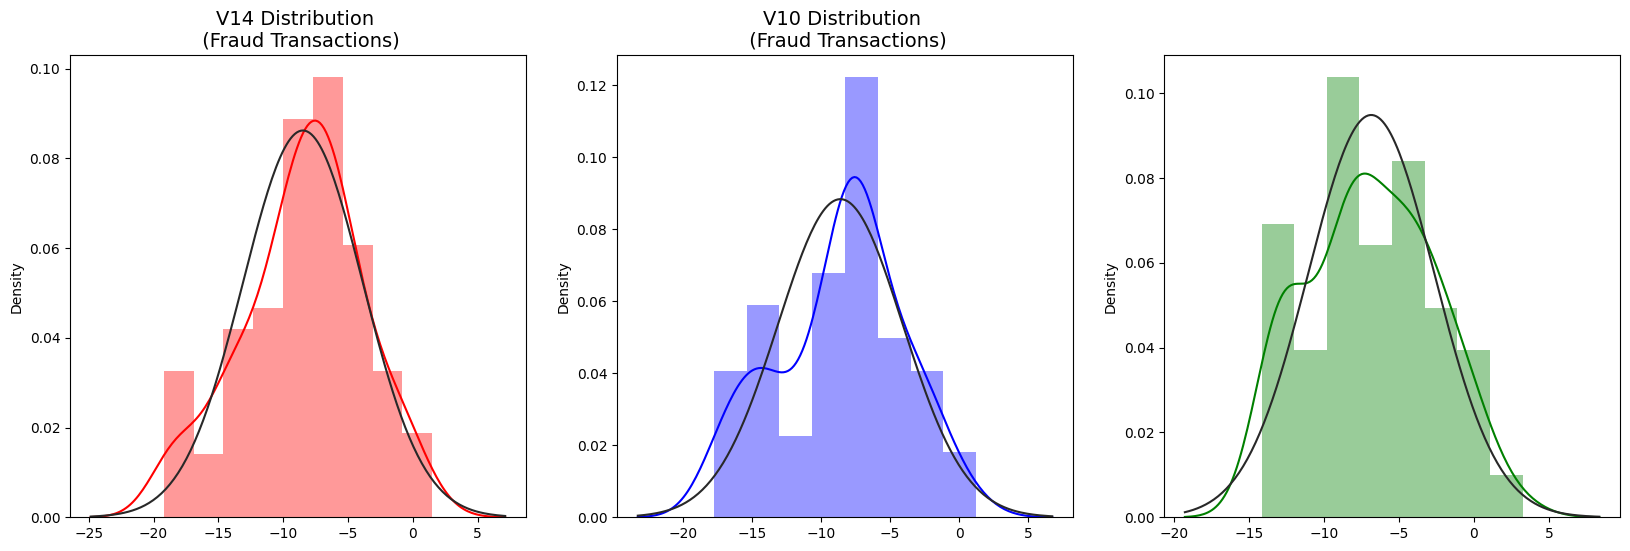

In [31]:
from scipy.stats import norm

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax1,fit=norm, color='red')
ax1.set_title('V14 Distribution \n (Fraud Transactions)',fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=ax2,fit=norm, color='blue')
ax2.set_title('V12 Distribution \n (Fraud Transactions)',fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=ax3,fit=norm, color='green')
ax2.set_title('V10 Distribution \n (Fraud Transactions)',fontsize=14)

REMOVING OUTLIERS
We will use interquatile range to remove outliers from highly correlated features

IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

Q1 represents the 25th percentile of the data.
Q2 represents the 50th percentile of the data.
Q3 represents the 75th percentile of the data.
IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [32]:
#Complete Line 2-16
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 =np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr =q75 - q25
print('iqr: {}'.format(v14_iqr))
v14_cut_off =v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

###################################################################################################################

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

##################################################################################################################

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -10.924186865147 | Quartile 75: -5.33014378246253
iqr: 5.59404308268447
Cut Off: 8.391064624026704
V14 Lower: -19.315251489173704
V14 Upper: 3.060920841564174
Feature V14 Outliers for Fraud Cases: 0
V14 outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -19.619958552370417
V12 Upper: 2.435854787040027
V12 outliers: []
Feature V12 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 582
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -17.480888874490113
V10 Upper: 4.54061343799077
V10 outliers: []
Feature V10 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 580


Text(0, -12, 'Fewer extreme \n outliers')

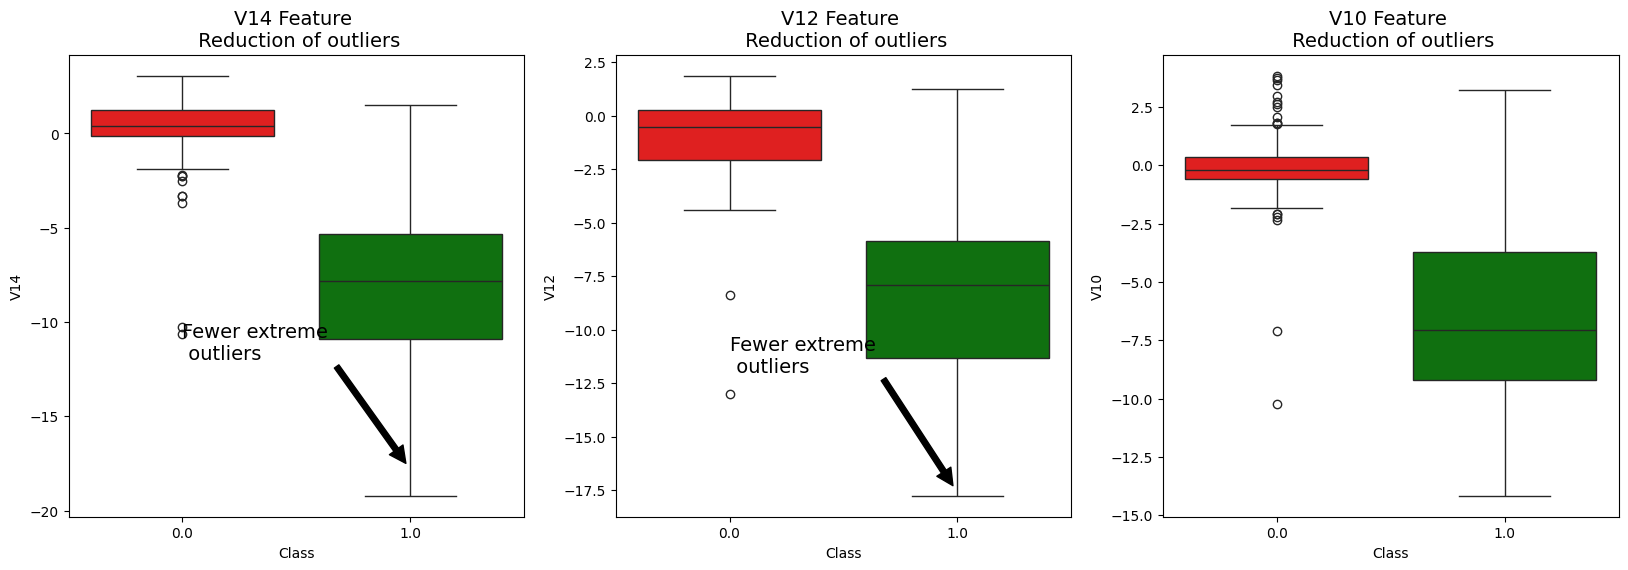

In [33]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

colors = ['red','green']

#feature V14
sns.boxplot(x='Class',y='V14',data=new_df,ax=ax1,palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

#feature v12
sns.boxplot(x='Class',y='V12',data=new_df,ax=ax2,palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

#feature V10
sns.boxplot(x='Class',y='V10',data=new_df,ax=ax3,palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

Implementing Models

In [34]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# SPLITTING IN TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#converting to array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [36]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)
X.columns


X_shapes:
 X_train: X_test:
 (464, 29) (116, 29) 

Y_shapes:
 Y_train: Y_test:
 (464,) (116,)


Index(['scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

As we have a classification problem on our hands we'll apply classification models and calculate the cross validation score to identify the best fit for our data.

Some of the models that we are going to use are.

LogisticRegression

KNeighborsClassifier

Support Vector Classifier



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [38]:
Models = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),

}

We are going to use sklearn cross_val_score to compare model performances, for this we'll see which model has best mean average accuracy over given number of folds.

In [39]:
from sklearn.model_selection import cross_val_score


for key, classifier in Models.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier:  LogisticRegression has a training score of 97.0 % accuracy score
Classifier:  KNeighborsClassifier has a training score of 97.0 % accuracy score
Classifier:  SVC has a training score of 97.0 % accuracy score


Logistic regression appears to be working best for us.
Hyperparameter search using GridSearch

Now we try to look for the best set of paramters for models using gridsearch

In [41]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
'''Steps:
    1. creating dict of parameters we are going to check
    2. applying grid search cv on our model and get model with best parameters
    3. Fit this new Model with X_train,y_train

'''

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_



In [42]:
print(log_reg,'\n', knears_neighbors,'\n' ,svc,'\n')

LogisticRegression(C=0.1) 
 KNeighborsClassifier(n_neighbors=3) 
 SVC(C=0.7) 



Validation
Now we have our best set models trained using gridsearch now we move onto testing them on different metrices so as to know which one works best overall for us.

1. log_reg
2. knears_negihbors
3. svc
4. tree_clf
we'll evaluate model using:

Cross_val_score
ROC AUC Score
ROC Curve
Confusion Matrix, Classification report
Average precison score, Area under precision recall curve
Now we find cross_validation scores for the models we got using GridsearchCV, use log_reg, knears_negihbors, svc and tree_clf in the below cell.

In [44]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')



Logistic Regression Cross Validation Score:  97.41%
Knears Neighbors Cross Validation Score 97.63%
Support Vector Classifier Cross Validation Score 97.41%


SVC and Logistic regression have best cross validation score

Let us also calculate roc_auc_score and also we will plot roc_curv

In [46]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = log_reg.predict(X_test)

knears_pred = knears_neighbors.predict(X_test)

svc_pred = svc.predict(X_test)



In [47]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))


Logistic Regression:  0.9782608695652174
KNears Neighbors:  1.0
Support Vector Classifier:  0.9946236559139785


Plotting

In [48]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)


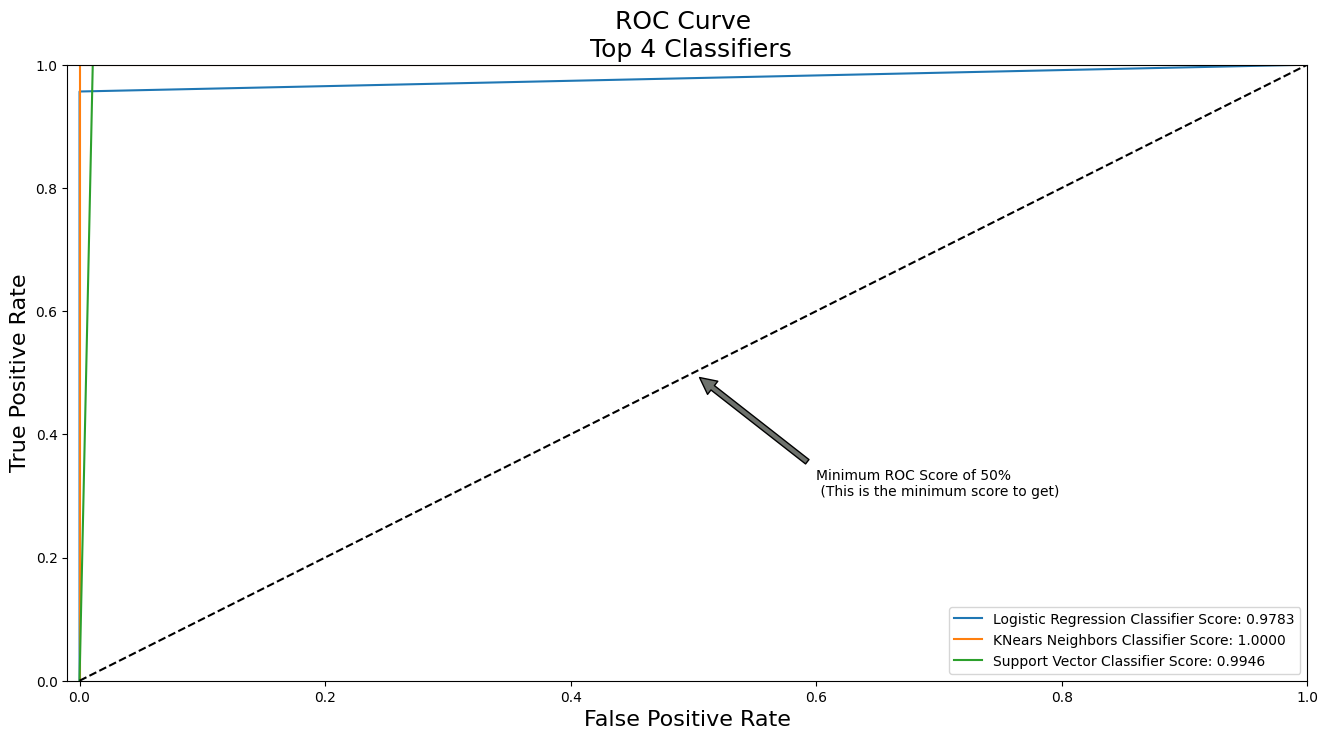

In [50]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()


SVC has better ROC AUC Score and we can see that from the Curve as well, it is the best model till now.

We Now calculate confusion matrix and classification report to do some quantitative evaluation on validation set.

* We'll be validating our models on the "X_test" dataset we spared in train test split, so this is what our data looks like,
\
X_shapes: X_train, X_test:(756, 29) (190, 29)
\
Y_shapes: Y_train, Y_test: (756,) (190,)
\
y_test fraud and non-fraud data points respectively 86, 104.

[Text(0, 0.5, ''), Text(0, 1.5, '')]

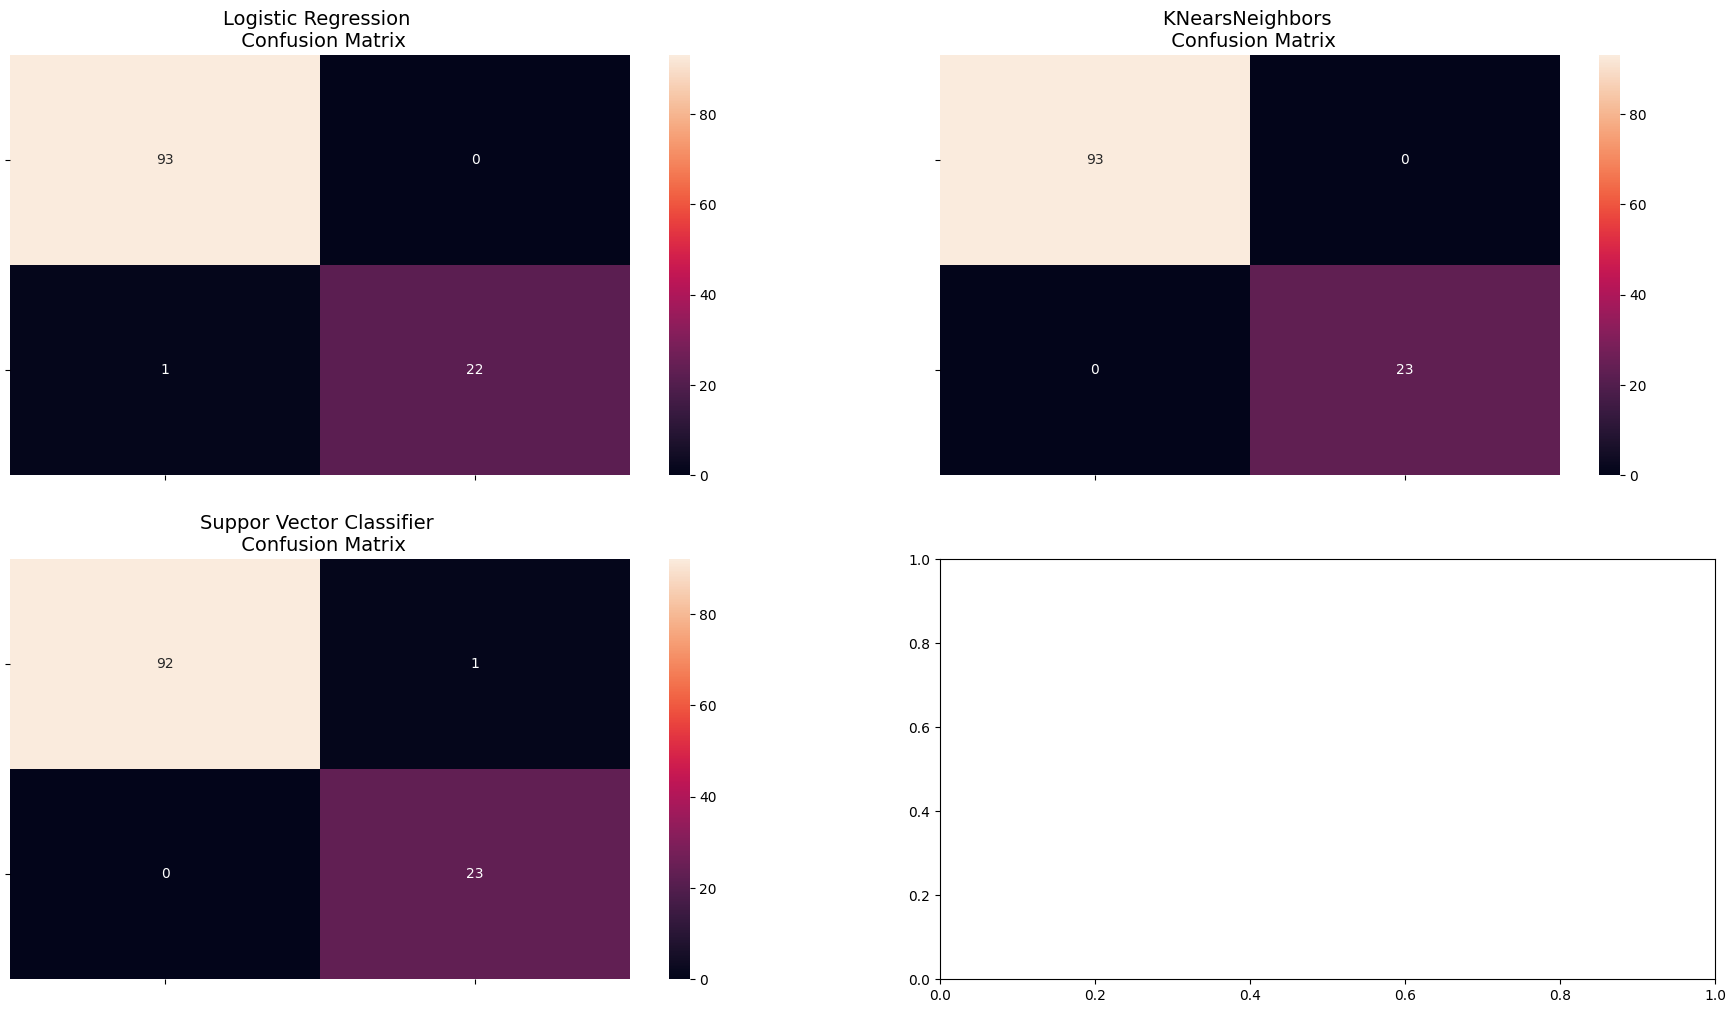

In [74]:
from sklearn.metrics import confusion_matrix
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)



log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)


fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)



Confusion matrix heatmaps above shows how our model doing on validation set from undersampled data, confusion matrix works as shown below

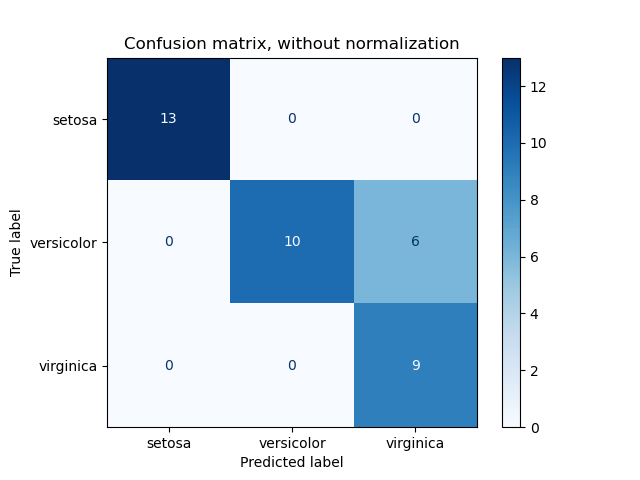











Confusion matrix heatmaps above shows how our model doing on validation set from undersampled data, confusion matrix works as shown below

As we can see from the image above values in the squares along horizontal axis are the true values of a class and cells along vertical axis contains predicted values

As from above discussion we now know what our values in the cofusion matrix above stand for so now we'll calculate precision and recall for each classes.

Precision = True Positive / (True Positive + False Positive)
Recall = True Positive / (True Positive + False Negative)
F1-Score = (2 * Precision * Recall) / (Precision + Recall)
It's evident that we need to look at recall to judge best performing model since we want to reduce False negatives for class 1(fraud).

In [53]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))



Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        93
         1.0       1.00      0.96      0.98        23

    accuracy                           0.99       116
   macro avg       0.99      0.98      0.99       116
weighted avg       0.99      0.99      0.99       116

KNears Neighbors:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        93
         1.0       1.00      1.00      1.00        23

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

Support Vector Classifier:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        93
         1.0       0.96      1.00      0.98        23

    accuracy                           0.99       116
   macro avg       0.98      0.99      0.99       116
weighted

Testing
Now we'll test our models on original test data "original_Xtest".

First of all let's see confusion matrix for all our models.

In [55]:
org_log_reg_pred = log_reg.predict(original_Xtest)

org_knears_pred = knears_neighbors.predict(original_Xtest)

org_svc_pred = svc.predict(original_Xtest)



Now we see confusion matrix for the same.

In [58]:
org_log_reg_cf = confusion_matrix(original_ytest, org_log_reg_pred)
org_kneighbors_cf = confusion_matrix(original_ytest, org_knears_pred)
org_svc_cf = confusion_matrix(original_ytest, org_svc_pred)


print(org_log_reg_cf, '\n', org_kneighbors_cf, '\n', org_svc_cf, '\n' )

[[5528   17]
 [   3   15]] 
 [[5540    5]
 [   2   16]] 
 [[5496   49]
 [   2   16]] 



SVC has least False negatives as expected for fraud class.

Let's have a look at the classification report of the models.

In [59]:
print('Logistic Regression:')
print(classification_report(original_ytest, org_log_reg_pred))

print('KNears Neighbors:')
print(classification_report(original_ytest, org_knears_pred))

print('Support Vector Classifier:')
print(classification_report(original_ytest, org_svc_pred))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5545
         1.0       0.47      0.83      0.60        18

    accuracy                           1.00      5563
   macro avg       0.73      0.92      0.80      5563
weighted avg       1.00      1.00      1.00      5563

KNears Neighbors:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5545
         1.0       0.76      0.89      0.82        18

    accuracy                           1.00      5563
   macro avg       0.88      0.94      0.91      5563
weighted avg       1.00      1.00      1.00      5563

Support Vector Classifier:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      5545
         1.0       0.25      0.89      0.39        18

    accuracy                           0.99      5563
   macro avg       0.62      0.94      0.69      5563
weighted

As we can see other models have comapreable or better numbers in F1 or precision but that is not the judging criteria for us our recall of fraud class is what concerns us the most and that we have best for SVC.

0.39116427736832643